Denominar la notebook reemplazando NN con el número de su grupo. 

En esta celda colocar Apellido y Nombres de cada uno de los integrantes del grupo que realizan la entrega de este trabajo:

- Flores Diego
- Mengual Matias
- Villagra Ignacio
- Parada Larrosa Francisco

ENUNCIADO:

SPY son las siglas de un Fondo que sigue el índice de Standard & Poor 500 y que cotiza en bolsa. Nos proponemos analizar una serie de tiempo con datos históricos de este Fondo. 

Las siguientes celdas son un paso a paso para realizar este análisis.

In [6]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

from arch import arch_model

%matplotlib inline

import yfinance as yf
from pandas_datareader import data

In [8]:
df_spy = data.get_data_yahoo("SPY", start="2010-01-01", end="2020-12-31")

In [9]:
df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,88.860367
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,89.095596
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,89.158356
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,89.534683
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,89.832634


In [16]:
precios = df_spy["Close"]

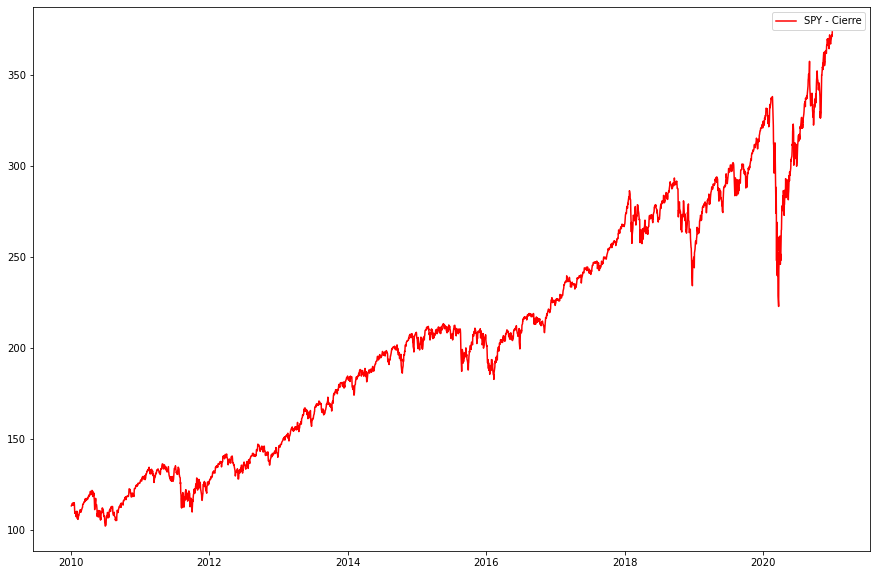

In [17]:
lrets = pd.DataFrame( )
lrets["Log Rets"] =  np.log(precios / precios.shift(1))

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
ax1.plot(precios, color = 'r',label = 'SPY - Cierre')
ax1.legend(loc = 'best')

plt.show()

In [11]:
###¿Diría que es una serie estacionaria? ¿Qué información le indica el test de adfuller?

adfuller(df_spy["Close"])

(0.4746332892018195,
 0.984081357783014,
 27,
 2741,
 {'1%': -3.4327379732269048,
  '5%': -2.862595034666578,
  '10%': -2.567331628897652},
 12435.932686228805)

In [12]:
## En tres La siguiente función puede utilizarse para analizar tres gráficos: la serie, la función 
## autocorrelación y la función de autocorrelación parcial

def tsplot(y, lags=None, figsize=(15, 10), style='bmh', titulo = 'Time Series Analysis Plots'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(titulo)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [18]:
## retornos
rets = ((precios-precios.shift(1))/precios.shift(1)).dropna()

/home/fligoonaut/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


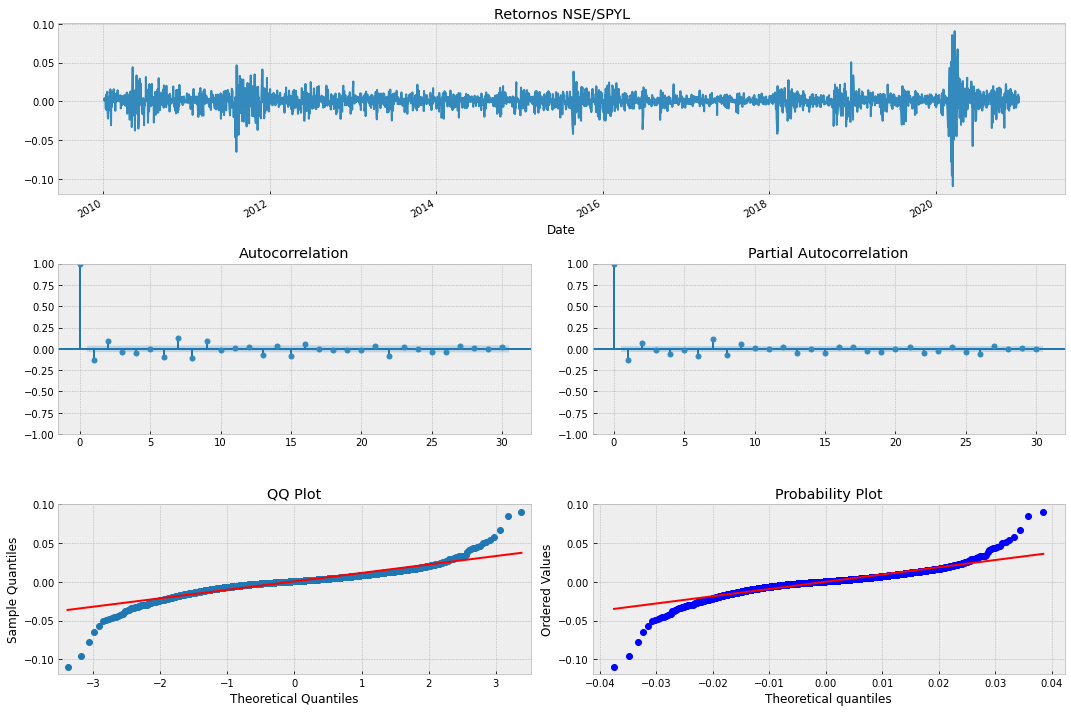

In [19]:
tsplot(rets, lags = 30, titulo = "Retornos NSE/SPYL")

In [ ]:
### Según el test de Dickey Fuller, ¿a qué nivel de confianza se puede rechazar la hipótesis nula
##de la existencia de una raíz unitaria en la serie de logretornos? 



In [21]:
## Con la función ar_select_order indique qué modelo AR(p) podría ajustarse a la serie de los logretornos.
## Utilice el gráfico de PACF para indicar si el resultado es coincidente con lo observado en las autocorrelaciones
## parciales. 
lrets = np.log(precios/precios.shift(1)).dropna()

sel = ar_select_order(lrets, 8, glob=True, old_names=False)

res = sel.model.fit()
print(res.summary())



                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 2768
Model:              Restr. AutoReg(8)   Log Likelihood                8609.119
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Mon, 28 Nov 2022   AIC                         -17204.239
Time:                        18:50:34   BIC                         -17162.778
Sample:                             8   HQIC                        -17189.262
                                 2768                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.219      0.026     5.3e-05       0.001
Close.L1      -0.1051      0.019     -5.551      0.000      -0.142      -0.068
Close.L2       0.0723      0.019      3.845      0.0

/home/fligoonaut/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fligoonaut/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
## Ajuste el modelo al AR(P) que corresponda. ¿Cuál es el valor del criterio de información de Akaike?
## Hacer
modelo = sm.tsa.arima.ARIMA(lrets, order=(0,0,0)).fit()
print(modelo.summary())

/home/fligoonaut/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fligoonaut/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fligoonaut/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2768
Model:                          ARIMA   Log Likelihood                8569.018
Date:                Mon, 28 Nov 2022   AIC                         -17134.036
Time:                        18:51:59   BIC                         -17122.185
Sample:                             0   HQIC                        -17129.756
                               - 2768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.003      0.045    9.23e-06       0.001
sigma2         0.0001   1.16e-06    103.457      0.000       0.000       0.000
Ljung-Box (L1) (Q):                  49.26   Jarque-

In [ ]:
## Analice ahora los residuos en este ajuste. ¿Diría que están correlacionados? 
## ¿Qué puede decir de los cuadrados de los residuos? ¿Se observa correlación? 

##  Si lo considera apropiado, ajuste los residuos a un modelo ARCH o GARCH. 


In [24]:
am = arch_model(modelo.resid, rescale = False)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     63,   Neg. LLF: 9110174371255212.0
Iteration:     10,   Func. Count:    124,   Neg. LLF: 1.9343601605824864e+28
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9255.676371741427
            Iterations: 17
            Function evaluations: 163
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9255.68
Distribution:                  Normal   AIC:                          -18503.4
Method:            Maximum Likelihood   BIC:                          -18479.6
                                        No. Observations:                 2768
Date:                Mon, Nov 28 2022   Df Residuals:                     2767
Time:  

In [ ]:

#Escriba un código que genere el modelo AR(p) con los parámetros obtenidos para la serie de logretornos.